<a href="https://colab.research.google.com/github/Aadityasindhuu/Aadityasindhuu/blob/main/Apple_Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
6import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from google.colab import files




In [ ]:
# Define a function to create sequences for the RNN
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

In [ ]:
# Upload the CSV file to Google Colab
uploaded = files.upload()

import pandas as pd

# Load CSV data into a DataFrame
df = pd.read_csv('AAPL.csv')

# Now you can work with the DataFrame 'df'


Saving AAPL.csv to AAPL (2).csv


In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date
df = df.sort_values('Date')

# Take only the 'Close' column for simplicity
data = df['Close'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [ ]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Choose the sequence length (e.g., 10 days)
sequence_length = 10

# Create sequences for training
X, y = create_sequences(scaled_data, sequence_length)


In [ ]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
7/7 [==============================] - 2s 10ms/step - loss: 0.3508
Epoch 2/50
7/7 [==============================] - 0s 9ms/step - loss: 0.2425
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 0.1498
Epoch 4/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0650
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 0.0271
Epoch 6/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0332
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0180
Epoch 8/50
7/7 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 9/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0165
Epoch 10/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0177
Epoch 11/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 12/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 13/50
7/7 [==============================] - 0s 11ms/step -

1/1 [==============================] - 0s 213ms/step


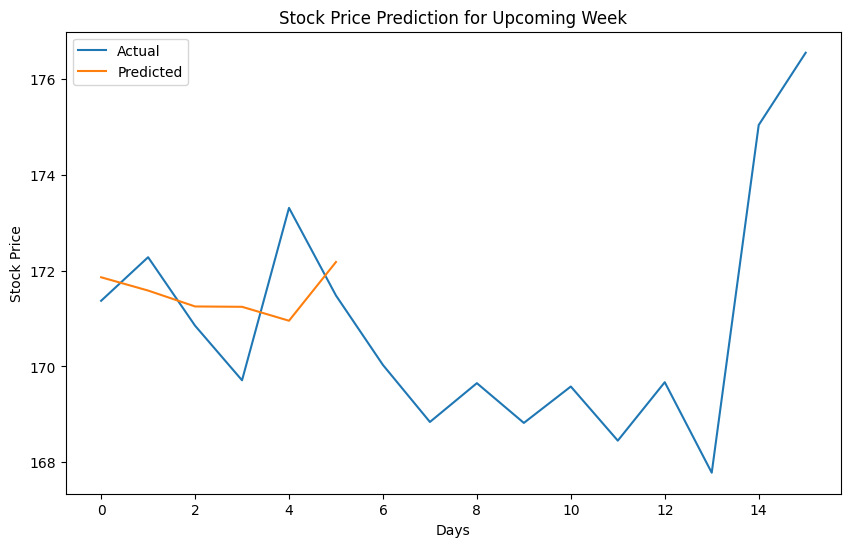

In [ ]:
# Extract data for the upcoming week (adjust date range as needed)
upcoming_week_data = df[df['Date'] >= '3/21/2024']  # Adjust date as needed

# Check if upcoming_week_data is empty
if upcoming_week_data.empty:
    print("Error: No data available for the specified upcoming week.")
else:
    upcoming_week_prices = upcoming_week_data['Close'].values.reshape(-1, 1)

    # Normalize the upcoming week's data using the same scaler used for training data
    scaled_upcoming_week_data = scaler.transform(upcoming_week_prices)

    # Create sequences for the upcoming week
    X_upcoming_week, y_upcoming_week = create_sequences(scaled_upcoming_week_data, sequence_length)

    # Generate predictions for the upcoming week using the trained model
    predictions_upcoming_week = model.predict(X_upcoming_week)
    predictions_upcoming_week = scaler.inverse_transform(predictions_upcoming_week)

    # Plot the actual vs predicted values for the upcoming week
    plt.figure(figsize=(10, 6))
    plt.plot(upcoming_week_prices, label='Actual')
    plt.plot(predictions_upcoming_week, label='Predicted')
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Prediction for Upcoming Week')
    plt.legend()
    plt.show()
